# 4.7. Por que a distribuição normal é importante?

 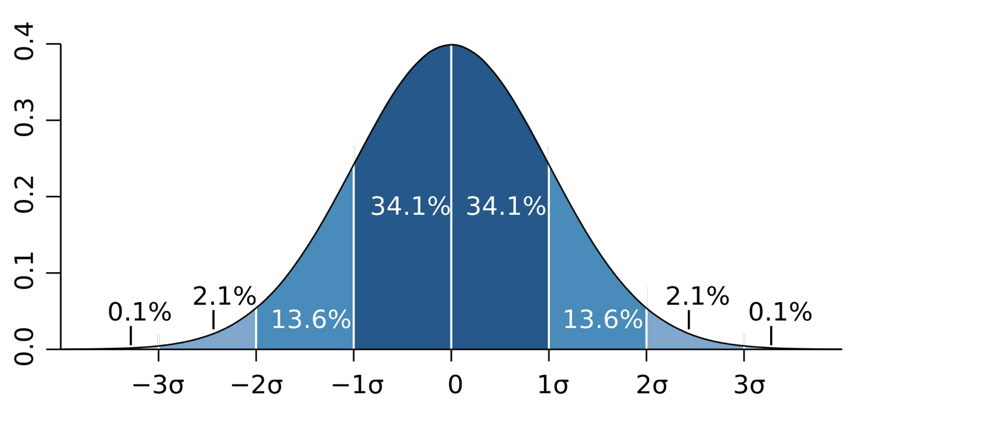

- Com uma distribuição normal de dados, 99,7% de todos os pontos de dados estão dentro de três desvios padrão da média em qualquer direção.
- O primeiro desvio padrão da média cobre 34,1% de todos os pontos de dados acima da média e 34,1% de todos os pontos de dados abaixo da média.
- O segundo desvio padrão engloba 13,6% adicionais de pontos de dados acima da média e outros 13,6% abaixo da média.
- O terceiro desvio padrão inclui 2,1% dos pontos de dados em qualquer direção – tanto no topo da escala quanto na base da escala.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import shapiro
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Capturando os dados para a análise

def busca_titulos_tesouro_direto():
    url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
    df  = pd.read_csv(url, sep=';', decimal=',')
    df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
    df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
    multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
    df = df.set_index(multi_indice).iloc[: , 3:]  
    return df

In [3]:
titulos = busca_titulos_tesouro_direto()
selic2025 = titulos.loc[("Tesouro Selic", "2025-03-01")]
selic2025.sort_index(inplace=True)

In [5]:
selic2025

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2019-02-01,0.02,0.06,9926.99,9902.94,9900.45
2019-02-04,0.02,0.06,9929.43,9905.40,9902.91
2019-02-05,0.02,0.06,9931.88,9907.87,9905.36
2019-02-06,0.02,0.06,9934.34,9910.33,9907.83
2019-02-07,0.02,0.06,9936.79,9912.80,9910.29
...,...,...,...,...,...
2022-10-17,0.05,0.06,12286.73,12277.53,12277.53
2022-10-18,0.04,0.05,12293.40,12284.19,12284.19
2022-10-19,0.04,0.05,12299.88,12290.67,12290.67


In [8]:
fig = make_subplots(rows = 1, cols = 1
                    , shared_xaxes = True
                    , vertical_spacing = 0.05)

fig.add_trace(go.Scatter(x = selic2025.index, y = selic2025["PU Compra Manha"]
                                , name = "Selic 2025 - Compra Manhã"
                                , line = dict(color = "blue"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = selic2025.index, y = selic2025["PU Venda Manha"]
                                , name = "Selic 2025 - Venda Manhã"
                                , line = dict(color = "red"))
              , row = 1, col = 1)

fig.update_layout(height = 600, width = 800
                  , title_text = "Selic 2025"
                  , font_color = "blue"
                  , title_font_color = "black"
                  , xaxis_title = ""
                  , yaxis_title = "PU Base Manha"
                  , showlegend = True
                  , legend_title = "Período"
                  , font = dict(size = 15, color = "Black")
                 )

fig.show()

In [9]:
selic2025["Retornos"] = selic2025["PU Base Manha"].pct_change(1)

In [10]:
fig = go.Figure(data = [go.Histogram(x = selic2025["Retornos"]*100)])

fig.update_layout(height = 600, width = 800
                  , title_text = "Distribuição dos retornos Selic 2025"
                  , font_color = "blue"
                  , title_font_color = "black"
                  , xaxis_title = "Retorno (%)"
                  , yaxis_title = "Frequência"
                  , font = dict(size = 15, color = "Black")
                 )
fig.show()

In [11]:
# Primeiro de tudo: os retornos deveriam seguir uma distribuição normal....

selic2025 = selic2025.dropna(axis = 0) 
stat, p = shapiro(selic2025["Retornos"])

# p <= alpha: reject H0, not normal.
# p > alpha: fail to reject H0, normal.

#https://plotly.com/python/v3/normality-test/
    
alpha = 0.05
if p > alpha:
    msg = 'Amostra Gaussiana (não rejeita H0)'
else:
    msg = 'Amostra não Gaussiana (rejeita H0)'

result_mat = [
    ["Tamanho da amostra", "Teste Estatístico", 'p-value', 'Comentário'],
    [len(selic2025["Retornos"]), stat, p, msg]
]
swt_table = ff.create_table(result_mat)
swt_table['data'][0].colorscale=[[0, 'blue'],[1, '#ffffff']]
swt_table['layout']['height'] = 100
swt_table['layout']['width'] = 950
swt_table['layout']['margin']['t'] = 10
swt_table['layout']['margin']['b'] = 10
swt_table